In [ ]:
import pandas as pd
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [ ]:
d_league = {"ENG":{'id':17,'season':{"22-23":41886}},
             "GER":{'id':35,'season':{"22-23":42268}},
             "SPA":{'id':8,'season':{"22-23":42409}},
             "ITA":{'id':23,'season':{"22-23":42415}},
             "FRA":{'id':34,'season':{"22-23":42273}}}

In [ ]:
l_player_stats = []

for league, item in d_league.items():
    for season, season_id in item['season'].items():
        if season == "22-23":
            with open(f'/content/{league}-{season}.pickle', 'rb') as handle:
                d_matches = pickle.load(handle)

            for id, info in d_matches.items():
                if 'lineups' in info.keys() and info['info']['status']['code'] != 70:
                    for situation in ['home', 'away']:
                        for player in info['lineups'][situation]['players']:
                            if 'statistics' in player.keys():
                                d_player_stats = {}

                                d_player_stats['matchId'] = id
                                d_player_stats['teamId'] = info['info']['{}Team'.format(situation)]['id']
                                d_player_stats['teamName'] = info['info']['{}Team'.format(situation)]['shortName']
                                d_player_stats['isHome'] = situation == 'home'
                                d_player_stats['playerId'] = player['player']['id']
                                d_player_stats['playerFullName'] = player['player']['name']
                                d_player_stats['playerName'] = player['player']['shortName']
                                d_player_stats['position'] = player['position']
                                d_player_stats['substitute'] = player['substitute']
                                d_player_stats['league'] = league  # Add league field

                                for metric, value in player['statistics'].items():
                                    if metric != 'ratingVersions':
                                        d_player_stats[metric] = value

                                l_player_stats.append(d_player_stats)

# Convert the list of player stats to a DataFrame
df_player_stats = pd.DataFrame(l_player_stats)

# Set pandas display options to prevent line breaks
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to next line

# Display the first 10 rows of the DataFrame
print(df_player_stats.head(10))

    matchId  teamId teamName  isHome  playerId     playerFullName     playerName position  substitute league  totalPass  accuratePass  totalLongBalls  aerialWon  duelWon  totalClearance  errorLeadToAGoal  goodHighClaim  punches  totalKeeperSweeper  accurateKeeperSweeper  minutesPlayed  touches  rating  possessionLostCtrl  expectedGoals  goalsPrevented  totalCross  accurateCross  totalContest  wonContest  outfielderBlock  interceptionWon  totalTackle  wasFouled  keyPass  expectedAssists  accurateLongBalls  aerialLost  duelLost  fouls  dispossessed  challengeLost  bigChanceCreated  blockedScoringAttempt  shotOffTarget  onTargetScoringAttempt  totalOffside  bigChanceMissed  goals  goalAssist  savedShotsFromInsideTheBox  saves  hitWoodwork  errorLeadToAShot  clearanceOffLine  lastManTackle  ownGoals  penaltyWon  penaltyConceded  penaltyMiss  penaltySave
0  10385697      38  Chelsea    True    845074      Edouard Mendy       E. Mendy        G       False    ENG       16.0          15.0     

In [ ]:
# Filter to keep only forwards
l_player_stats = [player for player in l_player_stats if player['position'] == 'F']
df_player_stats = pd.DataFrame(l_player_stats)
df_player_stats.head(10)

,matchId,teamId,teamName,isHome,playerId,playerFullName,playerName,position,substitute,league,totalPass,accuratePass,aerialWon,duelLost,duelWon,challengeLost,dispossessed,totalContest,wonContest,totalClearance,totalTackle,wasFouled,fouls,totalOffside,minutesPlayed,touches,rating,possessionLostCtrl,expectedGoals,expectedAssists,totalLongBalls,aerialLost,bigChanceMissed,shotOffTarget,onTargetScoringAttempt,blockedScoringAttempt,totalCross,accurateCross,goals,interceptionWon,keyPass,accurateLongBalls,bigChanceCreated,hitWoodwork,errorLeadToAGoal,goalAssist,outfielderBlock,penaltyWon,penaltyMiss,ownGoals,penaltyConceded,errorLeadToAShot,clearanceOffLine,lastManTackle
0,10385697,38,Chelsea,True,966547,Noni Madueke,N. Madueke,F,False,ENG,27.0,23.0,1.0,10.0,9.0,1.0,3.0,7.0,3.0,2.0,3.0,2.0,2.0,1.0,73.0,52.0,6.5,13.0,0.0000,0.063806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10385697,38,Chelsea,True,851671,João Félix,J. Félix,F,False,ENG,21.0,18.0,NaN,3.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,3.0,2.0,NaN,73.0,35.0,6.4,8.0,0.2950,0.012373,2.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10385697,38,Chelsea,True,138534,Raheem Sterling,R. Sterling,F,False,ENG,30.0,27.0,1.0,9.0,8.0,NaN,4.0,8.0,4.0,1.0,2.0,1.0,NaN,NaN,90.0,60.0,8.4,14.0,0.6105,0.046443,NaN,1.0,NaN,1.0,2.0,2.0,3.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10385697,38,Chelsea,True,1090458,David Datro Fofana,D. D. Fofana,F,True,ENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10385697,14,Forest,False,865912,Morgan Gibbs-White,M. Gibbs-White,F,False,ENG,18.0,11.0,1.0,5.0,6.0,NaN,1.0,6.0,3.0,NaN,2.0,NaN,1.0,NaN,90.0,39.0,6.7,18.0,0.0000,0.092934,3.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10385697,14,Forest,False,1064039,Danilo,Danilo,F,False,ENG,10.0,2.0,1.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,89.0,21.0,6.5,9.0,0.0969,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10385697,14,Forest,False,359664,Taiwo Awoniyi,T. Awoniyi,F,False,ENG,12.0,5.0,3.0,9.0,7.0,NaN,1.0,1.0,NaN,NaN,2.0,2.0,2.0,2.0,81.0,22.0,8.2,11.0,0.4316,NaN,1.0,5.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10385697,14,Forest,False,1085180,Brennan Johnson,B. Johnson,F,True,ENG,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.0,6.5,2.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10385697,14,Forest,False,817567,Sam Surridge,S. Surridge,F,True,ENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10385697,14,Forest,False,27035,André Ayew,A. Ayew,F,True,ENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove specific columns from the DataFrame
columns_to_remove = ['matchId', 'teamId', 'teamName', 'isHome', 'playerName', 'position', 'substitute']
df_filtered_stats = df_player_stats.drop(columns=columns_to_remove)

# Display the first 10 rows of the filtered DataFrame
print("\nFiltered DataFrame:")
print(df_filtered_stats.head(10))



Filtered DataFrame:
   playerId      playerFullName league  totalPass  accuratePass  aerialWon  duelLost  duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled  fouls  totalOffside  minutesPlayed  touches  rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  bigChanceMissed  shotOffTarget  onTargetScoringAttempt  blockedScoringAttempt  totalCross  accurateCross  goals  interceptionWon  keyPass  accurateLongBalls  bigChanceCreated  hitWoodwork  errorLeadToAGoal  goalAssist  outfielderBlock  penaltyWon  penaltyMiss  ownGoals  penaltyConceded  errorLeadToAShot  clearanceOffLine  lastManTackle
0    966547        Noni Madueke    ENG       27.0          23.0        1.0      10.0      9.0            1.0           3.0           7.0         3.0             2.0          3.0        2.0    2.0           1.0           73.0     52.0     6.5                13.0         0.0000         0.063806             NaN         

In [ ]:
# Filter the DataFrame for rows where playerId matches the specified value
filtered_player_stats = df_filtered_stats[df_filtered_stats['playerId'] == 966547]

# Check if there are any entries for the specified playerId
if not filtered_player_stats.empty:
    print(f"Entries for playerId:")
    print(filtered_player_stats)
else:
    print(f"No entries found for playerId.")

count = sum(1 for player in l_player_stats if player['playerId'] == 966547)
print("Number of entries with playerId:", count)

Entries for playerId:
      playerId playerFullName league  totalPass  accuratePass  aerialWon  duelLost  duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled  fouls  totalOffside  minutesPlayed  touches  rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  bigChanceMissed  shotOffTarget  onTargetScoringAttempt  blockedScoringAttempt  totalCross  accurateCross  goals  interceptionWon  keyPass  accurateLongBalls  bigChanceCreated  hitWoodwork  errorLeadToAGoal  goalAssist  outfielderBlock  penaltyWon  penaltyMiss  ownGoals  penaltyConceded  errorLeadToAShot  clearanceOffLine  lastManTackle
0       966547   Noni Madueke    ENG       27.0          23.0        1.0      10.0      9.0            1.0           3.0           7.0         3.0             2.0          3.0        2.0    2.0           1.0           73.0     52.0     6.5                13.0         0.0000         0.063806             NaN         NaN

In [ ]:
# Group the DataFrame by playerId and aggregate
grouped_stats = df_filtered_stats.groupby('playerId').agg(
    MatchPlayed=('playerId', 'count'),  # Count occurrences for MatchPlayed
    PlayerName=('playerFullName', 'first'),  # Keep the first instance of PlayerName
    League=('league', 'first')  # Keep the first instance of League
)

# Sum all other columns
grouped_stats = grouped_stats.join(df_filtered_stats.drop(['playerId', 'playerFullName', 'league'], axis=1).groupby(df_filtered_stats['playerId']).mean(), on='playerId')

# Reset the index to turn playerId back into a column
grouped_stats.reset_index(inplace=True)

# Display the resulting grouped DataFrame
print("Grouped Player Statistics:")
print(grouped_stats)


Grouped Player Statistics:
      playerId  MatchPlayed               PlayerName League  totalPass  accuratePass  aerialWon  duelLost   duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled     fouls  totalOffside  minutesPlayed    touches    rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  bigChanceMissed  shotOffTarget  onTargetScoringAttempt  blockedScoringAttempt  totalCross  accurateCross     goals  interceptionWon   keyPass  accurateLongBalls  bigChanceCreated  hitWoodwork  errorLeadToAGoal  goalAssist  outfielderBlock  penaltyWon  penaltyMiss  ownGoals  penaltyConceded  errorLeadToAShot  clearanceOffLine  lastManTackle
0          750           12        Cristiano Ronaldo    ENG  15.800000     12.100000   2.142857  2.625000  2.888889       1.000000        1.5000      1.400000    2.000000        1.600000     1.000000   1.250000  1.166667      1.333333      52.600000  23.000000  6.780000         

In [ ]:
# Filter the grouped_stats DataFrame to keep only players with 5 or more matches played
filtered_grouped_stats = grouped_stats[grouped_stats['MatchPlayed'] >= 5]

# Display the resulting filtered DataFrame
print("Filtered Grouped Player Statistics (5 or more matches played):")
print(filtered_grouped_stats)


Filtered Grouped Player Statistics (5 or more matches played):
      playerId  MatchPlayed               PlayerName League  totalPass  accuratePass  aerialWon  duelLost   duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled     fouls  totalOffside  minutesPlayed    touches    rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  bigChanceMissed  shotOffTarget  onTargetScoringAttempt  blockedScoringAttempt  totalCross  accurateCross     goals  interceptionWon   keyPass  accurateLongBalls  bigChanceCreated  hitWoodwork  errorLeadToAGoal  goalAssist  outfielderBlock  penaltyWon  penaltyMiss  ownGoals  penaltyConceded  errorLeadToAShot  clearanceOffLine  lastManTackle
0          750           12        Cristiano Ronaldo    ENG  15.800000     12.100000   2.142857  2.625000  2.888889       1.000000      1.500000      1.400000    2.000000        1.600000     1.000000   1.250000  1.166667      1.333333      52.

In [ ]:
# Ensure that the 'rating' column exists and sort the DataFrame by 'rating' in descending order
sorted_filtered_stats = filtered_grouped_stats.sort_values(by='rating', ascending=False)

# Reset the index after sorting
sorted_filtered_stats.reset_index(drop=True, inplace=True)

# Display the resulting sorted DataFrame
print("Sorted Filtered Grouped Player Statistics by Rating:")
print(sorted_filtered_stats)


Sorted Filtered Grouped Player Statistics by Rating:
     playerId  MatchPlayed             PlayerName League  totalPass  accuratePass  aerialWon  duelLost   duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled     fouls  totalOffside  minutesPlayed    touches    rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  bigChanceMissed  shotOffTarget  onTargetScoringAttempt  blockedScoringAttempt  totalCross  accurateCross     goals  interceptionWon   keyPass  accurateLongBalls  bigChanceCreated  hitWoodwork  errorLeadToAGoal  goalAssist  outfielderBlock  penaltyWon  penaltyMiss  ownGoals  penaltyConceded  errorLeadToAShot  clearanceOffLine  lastManTackle
0       12994           31           Lionel Messi    FRA  60.451613     50.129032        1.0  5.354839  5.400000       1.153846      2.551724      5.451613    3.366667             NaN     1.444444   1.700000  1.333333      1.200000      88.774194  82.09677

In [ ]:
# Sort the filtered_grouped_stats DataFrame by the expectedGoals column in descending order
sorted_filtered_stats = filtered_grouped_stats.sort_values(by='playerId')

# Reset index for better readability after sorting
sorted_filtered_stats.reset_index(drop=True, inplace=True)

# Display the resulting sorted DataFrame
print("Sorted Filtered Grouped Player Statistics by Expected Goals:")
print(sorted_filtered_stats)


Sorted Filtered Grouped Player Statistics by Expected Goals:
     playerId  MatchPlayed               PlayerName League  totalPass  accuratePass  aerialWon  duelLost   duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled     fouls  totalOffside  minutesPlayed    touches    rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  bigChanceMissed  shotOffTarget  onTargetScoringAttempt  blockedScoringAttempt  totalCross  accurateCross     goals  interceptionWon   keyPass  accurateLongBalls  bigChanceCreated  hitWoodwork  errorLeadToAGoal  goalAssist  outfielderBlock  penaltyWon  penaltyMiss  ownGoals  penaltyConceded  errorLeadToAShot  clearanceOffLine  lastManTackle
0         750           12        Cristiano Ronaldo    ENG  15.800000     12.100000   2.142857  2.625000  2.888889       1.000000      1.500000      1.400000    2.000000        1.600000     1.000000   1.250000  1.166667      1.333333      52.6000

In [ ]:
# Count the number of players
total_players = sorted_filtered_stats['playerId'].count()
# Initialize a dictionary to hold NaN counts
nan_counts = {'Total Number of Players': total_players}

# Count NaN values in each column and add to the dictionary
for column in sorted_filtered_stats.columns:
    nan_count = sorted_filtered_stats[column].isna().sum()
    if nan_count > 0:  # Only include columns with NaN values
        nan_counts[f'{column} NaN Value'] = nan_count

# Print the results
print("NaN Counts in Player Statistics:")
for key, value in nan_counts.items():
    print(f"{key} - {value}")


NaN Counts in Player Statistics:
Total Number of Players - 727
totalPass NaN Value - 12
accuratePass NaN Value - 12
aerialWon NaN Value - 90
duelLost NaN Value - 13
duelWon NaN Value - 26
challengeLost NaN Value - 90
dispossessed NaN Value - 42
totalContest NaN Value - 43
wonContest NaN Value - 74
totalClearance NaN Value - 147
totalTackle NaN Value - 58
wasFouled NaN Value - 63
fouls NaN Value - 47
totalOffside NaN Value - 171
minutesPlayed NaN Value - 10
touches NaN Value - 10
rating NaN Value - 12
possessionLostCtrl NaN Value - 14
expectedGoals NaN Value - 10
expectedAssists NaN Value - 41
totalLongBalls NaN Value - 73
aerialLost NaN Value - 43
bigChanceMissed NaN Value - 217
shotOffTarget NaN Value - 82
onTargetScoringAttempt NaN Value - 87
blockedScoringAttempt NaN Value - 115
totalCross NaN Value - 81
accurateCross NaN Value - 236
goals NaN Value - 200
interceptionWon NaN Value - 174
keyPass NaN Value - 60
accurateLongBalls NaN Value - 124
bigChanceCreated NaN Value - 228
hitWood

In [ ]:
# Count NaN values for each column
nan_counts = sorted_filtered_stats.isna().sum()

# Identify columns with more than 100 NaN values (excluding totalClearance and goals)
columns_to_drop = nan_counts[nan_counts > 100].index.difference(['totalClearance', 'goals'])

# Drop the identified columns
cleaned_stats = sorted_filtered_stats.drop(columns=columns_to_drop)

# Replace NaN values in totalClearance and goals with 0
cleaned_stats['totalClearance'].fillna(0, inplace=True)
cleaned_stats['goals'].fillna(0, inplace=True)

# Display the cleaned DataFrame
print("Cleaned Player Statistics:")
print(cleaned_stats)


Cleaned Player Statistics:
     playerId  MatchPlayed               PlayerName League  totalPass  accuratePass  aerialWon  duelLost   duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled     fouls  minutesPlayed    touches    rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  shotOffTarget  onTargetScoringAttempt  totalCross     goals   keyPass
0         750           12        Cristiano Ronaldo    ENG  15.800000     12.100000   2.142857  2.625000  2.888889       1.000000      1.500000      1.400000    2.000000        1.600000     1.000000   1.250000  1.166667      52.600000  23.000000  6.780000            5.500000       0.187930         0.027520        1.000000    1.333333       1.625000                     1.5    1.000000  1.000000  1.500000
1        2089            7       Zlatan Ibrahimović    ITA  12.750000      9.000000   2.000000  3.333333  2.250000            NaN      1.000000      1.000000  

In [ ]:
# Initialize a list to hold players with NaN occurrences greater than 5
nan_occurrences = []

# Iterate over each row in the cleaned_stats DataFrame
for index, row in cleaned_stats.iterrows():
    # Count NaN values for the current player
    nan_count = row.isna().sum()
    if nan_count > 5:
        nan_occurrences.append({
            'playerId': row['playerId'],
            'playerName': row['PlayerName'],
            'NaNCount': nan_count
        })

# Print results
print("Players with NaN occurrences greater than 5:")
for player in nan_occurrences:
    print(f"{player['playerId']} - {player['playerName']} : {player['NaNCount']}")

# Print the total count of such players
total_nan_players = len(nan_occurrences)
print(f"\nTotal count of players with NaN occurrences > 5: {total_nan_players}")


Players with NaN occurrences greater than 5:
83687 - Álvaro Giménez : 11
108574 - Karim Bellarabi : 6
110508 - Mark Uth : 6
257433 - Jamal Lowe : 15
282095 - Adrian Grbić : 12
319735 - Viktor Tsygankov : 6
355072 - Asier Villalibre : 6
796443 - Jaime Báez : 9
796673 - Marcin Listkowski : 7
850971 - Manuel De Luca : 10
885179 - Paulinho : 6
893063 - Loren Morón : 11
904831 - Jason Mbock : 12
921032 - Benjamin Goller : 24
930246 - Yanis Begraoui : 12
936122 - Raimonds Krollis : 6
938270 - Abdoul Kader Bamba : 11
963398 - Janis Antiste : 8
963399 - Nathanaël Mbuku : 6
965795 - Lukáš Vorlický : 6
984184 - Nicola Zalewski : 6
991359 - Papa Ndiaga Yade : 7
992044 - Alex Mighten : 12
993451 - Cameron Archer : 8
997215 - Marko Lazetić : 13
1000015 - Emmanuel Ekong : 13
1004408 - Carlos Rojas : 24
1005996 - Thomas Kastanaras : 12
1016019 - Fernando Niño : 12
1019662 - Sekou Lega : 24
1046390 - John-Kymani Gordon : 24
1050695 - Filippo Distefano : 24
1085155 - Francisco Lopez Fernandez : 24
1100

In [ ]:
# Extract player IDs from nan_occurrences
nan_player_ids = [player['playerId'] for player in nan_occurrences]

# Remove players from cleaned_stats where playerId is in nan_player_ids
filtered_cleaned_stats = cleaned_stats[~cleaned_stats['playerId'].isin(nan_player_ids)]

# Display the resulting DataFrame after removal
print("DataFrame after removing players with NaN occurrences > 5:")
print(filtered_cleaned_stats)

DataFrame after removing players with NaN occurrences > 5:
     playerId  MatchPlayed           PlayerName League  totalPass  accuratePass  aerialWon  duelLost   duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled     fouls  minutesPlayed    touches    rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  shotOffTarget  onTargetScoringAttempt  totalCross     goals   keyPass
0         750           12    Cristiano Ronaldo    ENG  15.800000     12.100000   2.142857  2.625000  2.888889       1.000000      1.500000      1.400000    2.000000        1.600000     1.000000   1.250000  1.166667      52.600000  23.000000  6.780000            5.500000       0.187930         0.027520        1.000000    1.333333       1.625000                     1.5    1.000000  1.000000  1.500000
1        2089            7   Zlatan Ibrahimović    ITA  12.750000      9.000000   2.000000  3.333333  2.250000            NaN      1.00

In [ ]:
# Filter to include only the specified leagues
filtered_leagues = ['ENG', 'ITA', 'SPA', 'FRA', 'GER']
filtered_stats = cleaned_stats[cleaned_stats['League'].isin(filtered_leagues)]

# Group by league and calculate mean for each field
league_mean_stats = filtered_stats.groupby('League').mean(numeric_only=True)

# Create a new DataFrame to hold the summary with 5 rows per league
summary_df = pd.DataFrame()

# Add means for each league, limiting to 5 rows per league
for league in filtered_leagues:
    # Get the mean values for the current league
    mean_values = league_mean_stats.loc[league]

    # Create a DataFrame for the league
    league_summary = pd.DataFrame(mean_values).T  # Transpose to have rows as means
    league_summary['League'] = league  # Add league identifier
    summary_df = pd.concat([summary_df, league_summary], ignore_index=True)

# Select only the relevant columns for the final summary, removing MatchPlayed and playerId
summary_df = summary_df[['League'] + [col for col in mean_values.index if col not in ['MatchPlayed', 'playerId']]]
league_average = summary_df.copy()
# Display the summary table
print(league_average.head(5))  # Display the first 5 rows of the summary
pd.set_option('display.expand_frame_repr', TRUE)  # Prevent wrapping to next line

NameError: name 'cleaned_stats' is not defined

In [ ]:
# Function to replace NaN values with league averages
def fill_na_with_league_average(row):
    league = row['League']
    # Check if the league is in the summary_df
    if league in summary_df['League'].values:
        # Get the mean values for the corresponding league
        league_mean = summary_df.loc[summary_df['League'] == league].iloc[0]
        # Replace NaN values with the league mean
        for col in league_mean.index:
            if pd.isna(row[col]):  # Check if the value is NaN
                row[col] = league_mean[col]  # Replace with league mean
    return row

# Apply the function to each row in filtered_cleaned_stats
filled_stats = filtered_cleaned_stats.apply(fill_na_with_league_average, axis=1)
player_average = filled_stats.copy()
# Display the updated DataFrame with NaN values replaced
print("Player data with NaN values replaced by league averages:")
print(player_average)


Player data with NaN values replaced by league averages:
     playerId  MatchPlayed           PlayerName League  totalPass  accuratePass  aerialWon  duelLost   duelWon  challengeLost  dispossessed  totalContest  wonContest  totalClearance  totalTackle  wasFouled     fouls  minutesPlayed    touches    rating  possessionLostCtrl  expectedGoals  expectedAssists  totalLongBalls  aerialLost  shotOffTarget  onTargetScoringAttempt  totalCross     goals   keyPass
0         750           12    Cristiano Ronaldo    ENG  15.800000     12.100000   2.142857  2.625000  2.888889       1.000000      1.500000      1.400000    2.000000        1.600000     1.000000   1.250000  1.166667      52.600000  23.000000  6.780000            5.500000       0.187930         0.027520        1.000000    1.333333       1.625000                1.500000    1.000000  1.000000  1.500000
1        2089            7   Zlatan Ibrahimović    ITA  12.750000      9.000000   2.000000  3.333333  2.250000       1.279604      1.0000

In [ ]:
# Print column names to check for discrepancies
print(player_average.columns)


Index(['playerId', 'MatchPlayed', 'PlayerName', 'League', 'totalPass',
       'accuratePass', 'aerialWon', 'duelLost', 'duelWon', 'challengeLost',
       'dispossessed', 'totalContest', 'wonContest', 'totalClearance',
       'totalTackle', 'wasFouled', 'fouls', 'minutesPlayed', 'touches',
       'rating', 'possessionLostCtrl', 'expectedGoals', 'expectedAssists',
       'totalLongBalls', 'aerialLost', 'shotOffTarget',
       'onTargetScoringAttempt', 'totalCross', 'goals', 'keyPass'],
      dtype='object')


In [ ]:
# Create Player_Performance DataFrame
player_performance = pd.DataFrame()

# Populate the table with calculated fields
player_performance['PlayerName'] = player_average['PlayerName']
player_performance['League'] = player_average['League']
player_performance['MatchesPlayed'] = player_average['MatchPlayed']

# Calculate PassCompletion
player_performance['PassCompletion'] = player_average['accuratePass'] / player_average['totalPass']

# Calculate ShortPassing
player_performance['ShortPassing'] = (player_average['totalPass'] - (player_average['totalLongBalls'] + player_average['totalCross'])) / player_average['totalPass']

# Calculate KeyPassing
player_performance['KeyPassing'] = player_average['keyPass'] / player_average['totalPass']

# Calculate TotalDefContri
player_performance['TotalDefContri'] = (player_average['totalContest'] +
                                         player_average['totalClearance'] +
                                         player_average['totalTackle'] +
                                         player_average['aerialLost'] +
                                         player_average['aerialWon'])

# Calculate HoldingRatio
player_performance['HoldingRatio'] = player_average['dispossessed'] / player_average['touches']

# Calculate AerialSupriority
player_performance['AerialSupriority'] = player_average['aerialWon'] / (player_average['aerialWon'] + player_average['aerialLost'])

# Calculate Endurance
player_performance['Endurance'] = player_average['minutesPlayed'] / player_average['MatchPlayed']

# Calculate Aggression
player_performance['Aggression'] = player_average['fouls'] / player_performance['TotalDefContri']

# Include WasFouled field directly from player_average
player_performance['WasFouled'] = player_average['wasFouled']

# Calculate PerGameGA (Goals and Expected Assists per game)
player_performance['PerGameGA'] = (player_average['goals'] + (player_average['MatchPlayed'] * player_average['expectedAssists'])) / player_average['MatchPlayed']

# Calculate Positioning
player_performance['Positioning'] = (player_average['expectedGoals'] + player_average['expectedAssists']) / player_average['MatchPlayed']

# Calculate Finishing
player_performance['Finishing'] = player_average['onTargetScoringAttempt'] / (player_average['onTargetScoringAttempt'] + player_average['shotOffTarget'])

# Calculate ConversionRate
player_performance['ConversionRate'] = player_average['goals'] / (player_average['onTargetScoringAttempt'] + player_average['shotOffTarget'])

# Replace any NaN values resulting from division by zero with 0
player_performance.fillna(0, inplace=True)

# Display the head of the Player_Performance DataFrame
print(player_performance)

              PlayerName League  MatchesPlayed  PassCompletion  ShortPassing  KeyPassing  TotalDefContri  HoldingRatio  AerialSupriority  Endurance  Aggression  WasFouled  PerGameGA  Positioning  Finishing  ConversionRate
0      Cristiano Ronaldo    ENG             12        0.765823      0.873418    0.094937        7.476190      0.065217          0.616438   4.383333    0.156051   1.250000   0.110853     0.017954   0.480000        0.320000
1     Zlatan Ibrahimović    ITA              7        0.705882      0.679286    0.078431        6.768597      0.054054          0.600000   5.142857    0.147741   1.000000   0.176003     0.046621   0.500000        0.500000
2          Karim Benzema    SPA             24        0.870388      0.936011    0.050572        7.450866      0.031180          0.542254   3.548611    0.167766   1.200000   0.296418     0.046971   0.483871        0.383065
3          Kévin Gameiro    FRA             35        0.804709      0.856942    0.065405        6.172151      0.

In [ ]:
# Create League_Performance DataFrame
league_performance = pd.DataFrame()

# Populate the table with calculated fields
league_performance['League'] = league_average['League']

# Calculate PassCompletion
league_performance['PassCompletion'] = league_average['accuratePass'] / league_average['totalPass']

# Calculate ShortPassing
league_performance['ShortPassing'] = (league_average['totalPass'] - (league_average['totalLongBalls'] + league_average['totalCross'])) / league_average['totalPass']

# Calculate KeyPassing
league_performance['KeyPassing'] = (league_average['keyPass'] / league_average['totalPass'])

# Calculate TotalDefContri
league_performance['TotalDefContri'] = (league_average['totalContest'] +
                                         league_average['totalClearance'] +
                                         league_average['totalTackle'] +
                                         league_average['aerialLost'] +
                                         league_average['aerialWon'])

# Calculate HoldingRatio
league_performance['HoldingRatio'] = league_average['dispossessed'] / league_average['touches']

# Calculate AerialSupriority
league_performance['AerialSupriority'] = league_average['aerialWon'] / (league_average['aerialWon'] + league_average['aerialLost'])

# Calculate Aggression
league_performance['Aggression'] = league_average['fouls'] / league_performance['TotalDefContri']

# Include WasFouled field directly from league_average
league_performance['WasFouled'] = league_average['wasFouled']

# Calculate PerGameGA (Goals and Expected Assists per game)
league_performance['PerGameGA'] = (league_average['goals'] + league_average['expectedAssists'])

# Calculate Positioning
league_performance['Positioning'] = (league_average['expectedGoals'] + league_average['expectedAssists'])

# Calculate Finishing
league_performance['Finishing'] = league_average['onTargetScoringAttempt'] / (league_average['onTargetScoringAttempt'] + league_average['shotOffTarget'])

# Calculate ConversionRate
league_performance['ConversionRate'] = league_average['goals'] / (league_average['onTargetScoringAttempt'] + league_average['shotOffTarget'])

# Replace any NaN values resulting from division by zero with 0
league_performance.fillna(0, inplace=True)

# Display the head of the League_Performance DataFrame
print(league_performance.head())


  League  PassCompletion  ShortPassing  KeyPassing  TotalDefContri  HoldingRatio  AerialSupriority  Aggression  WasFouled  PerGameGA  Positioning  Finishing  ConversionRate
0    ENG        0.779893      0.766639    0.099569        8.352751      0.069330          0.457661    0.173101   1.565539   0.926353     0.266816   0.518141        0.317507
1    ITA        0.769269      0.751614    0.102769        8.239949      0.064598          0.460856    0.181177   1.599006   0.846250     0.225571   0.498914        0.291257
2    SPA        0.777727      0.740244    0.112332        8.117125      0.069206          0.476253    0.183644   1.603655   0.840115     0.241490   0.503849        0.281797
3    FRA        0.784404      0.772657    0.095223        8.062155      0.060768          0.455832    0.183047   1.588211   0.884384     0.268995   0.512916        0.298043
4    GER        0.736389      0.755689    0.105609        8.598843      0.068041          0.461095    0.163710   1.518178   0.953292   

# ***Graph Deviation Method***

# **Passing Metrics**

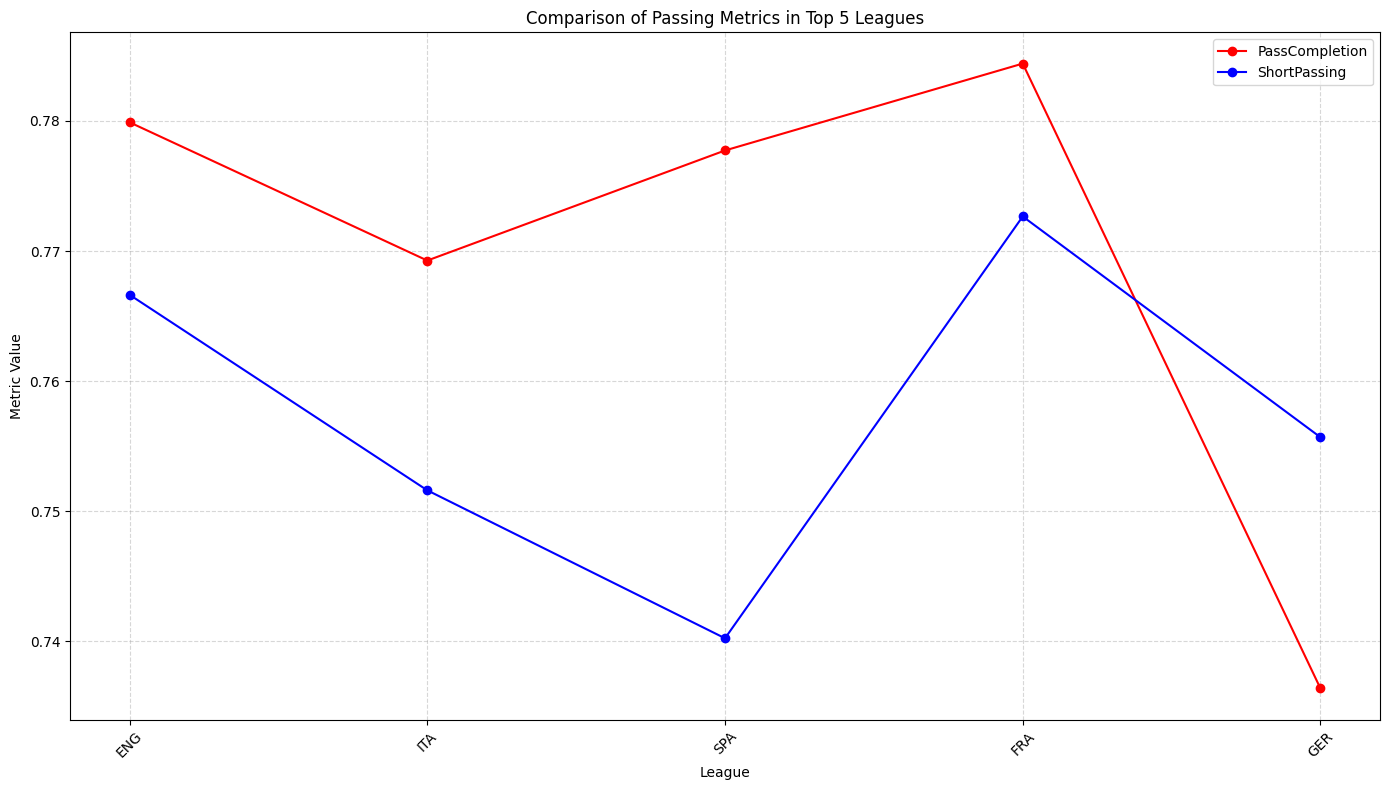

In [ ]:
metrics = ['PassCompletion', 'ShortPassing']
colors = ['r','b','g']

# Plot the line chart
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics):
    plt.plot(league_performance['League'], league_performance[metric], marker='o', linestyle='-', color=colors[i], label=metric)

# Add chart details
plt.title('Comparison of Passing Metrics in Top 5 Leagues')
plt.xlabel('League')
plt.ylabel('Metric Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

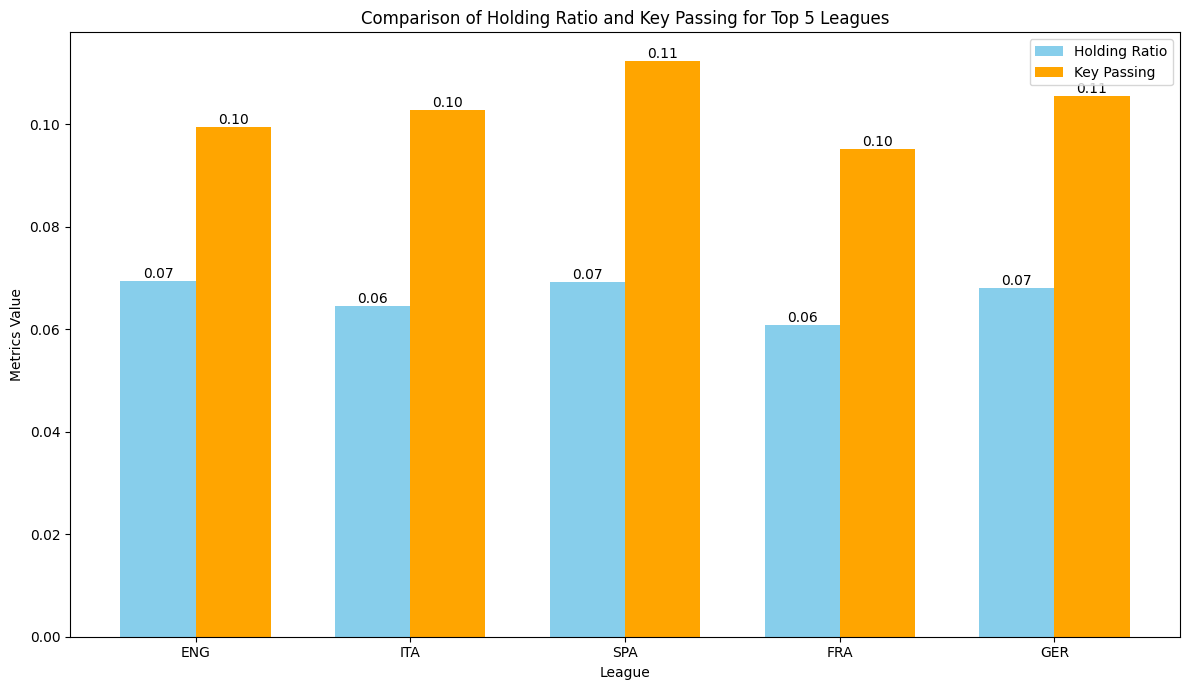

In [ ]:
leagues = league_performance['League']
holding_ratio = league_performance['HoldingRatio']
key_passing = league_performance['KeyPassing']

# Set the bar width
bar_width = 0.35

# Set positions for each bar
index = np.arange(len(leagues))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(index, holding_ratio, bar_width, label='Holding Ratio', color='skyblue')
bar2 = ax.bar(index + bar_width, key_passing, bar_width, label='Key Passing', color='orange')

# Add labels, title, and legend
ax.set_xlabel('League')
ax.set_ylabel('Metrics Value')
ax.set_title('Comparison of Holding Ratio and Key Passing for Top 5 Leagues')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(leagues)
ax.legend()

# Display the bar values on top of the bars
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

# Show the plot
plt.tight_layout()
plt.show()

# **Defensive Metrics**

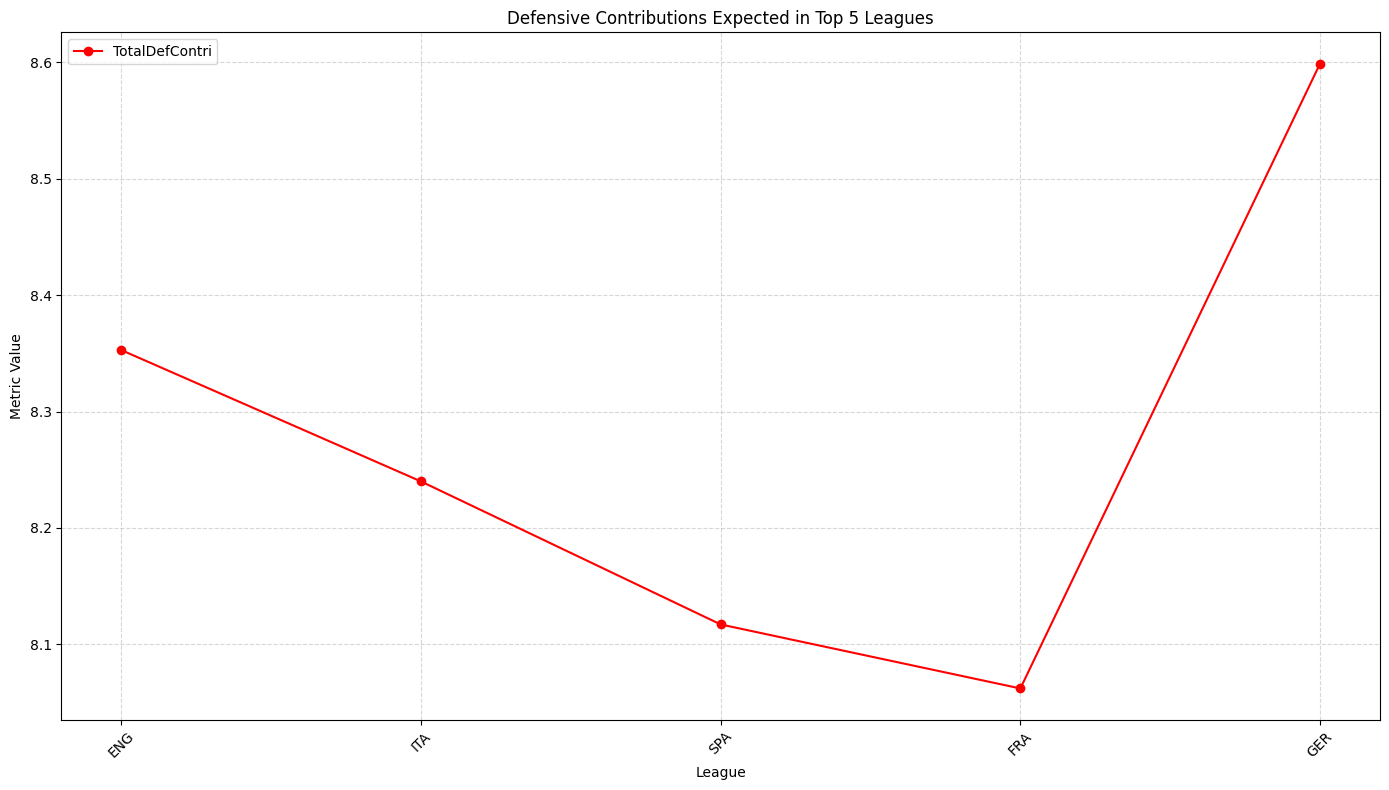

In [ ]:
metrics = ['TotalDefContri']
colors = ['r','g']

# Plot the line chart
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics):
    plt.plot(league_performance['League'], league_performance[metric], marker='o', linestyle='-', color=colors[i], label=metric)

# Add chart details
plt.title('Defensive Contributions Expected in Top 5 Leagues')
plt.xlabel('League')
plt.ylabel('Metric Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

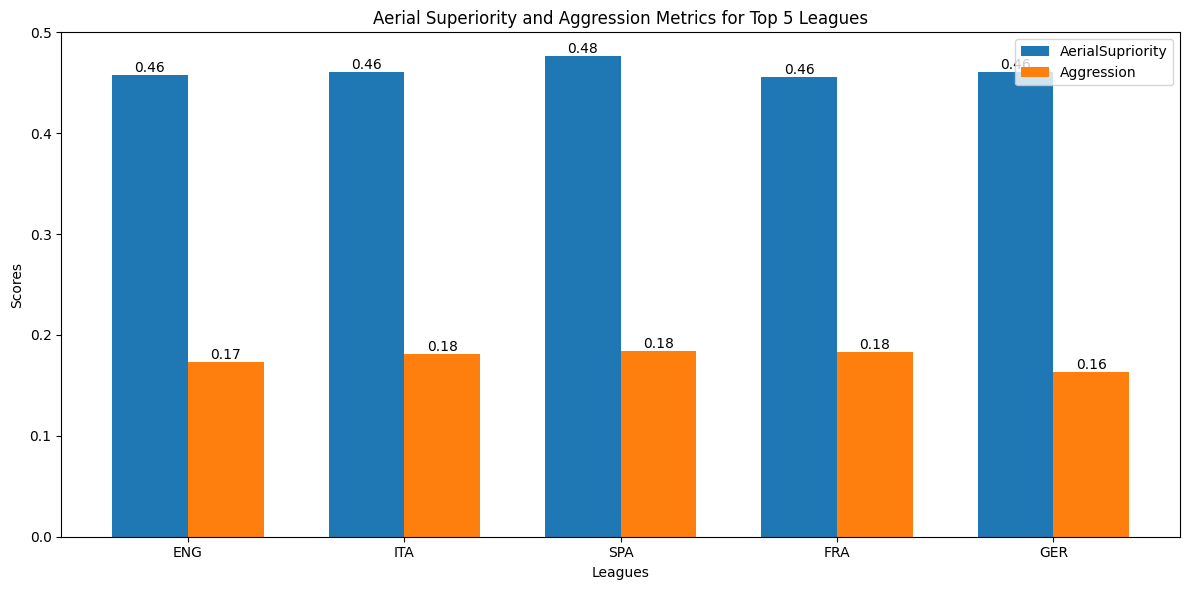

In [ ]:
# Define the metrics and data for plotting
metrics = ['AerialSupriority', 'Aggression']
leagues = league_performance['League']
aerial_values = league_performance['AerialSupriority']
aggression_values = league_performance['Aggression']

# Set the width of each bar and the positions for each group of bars
bar_width = 0.35
index = np.arange(len(leagues))

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, aerial_values, bar_width, label='AerialSupriority')
bar2 = ax.bar(index + bar_width, aggression_values, bar_width, label='Aggression')

# Add labels, title, and ticks
ax.set_xlabel('Leagues')
ax.set_ylabel('Scores')
ax.set_title('Aerial Superiority and Aggression Metrics for Top 5 Leagues')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(leagues)
ax.legend()

# Display the values on top of each bar for better clarity
for bar in bar1 + bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=10)

# Show the bar graph
plt.tight_layout()
plt.show()

# **Attacking Metrics**

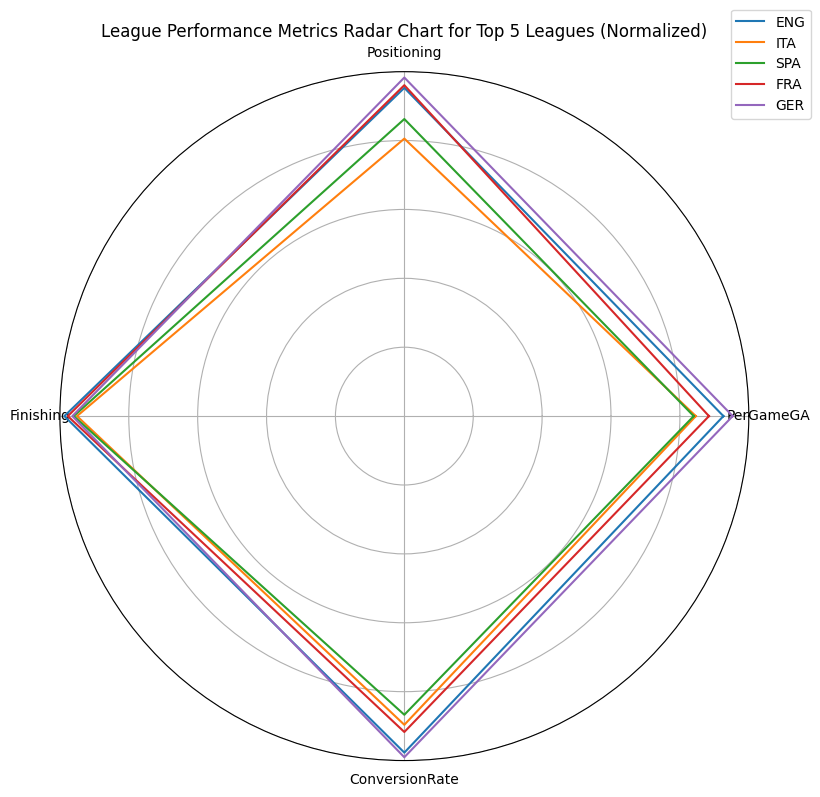

In [ ]:
# Define the metrics for the radar chart
metrics = ['PerGameGA', 'Positioning', 'Finishing', 'ConversionRate']
num_metrics = len(metrics)

# Create a list to hold the values for each league
league_values = []

# Extract the values for each league and normalize
for league in league_performance['League']:
    values = league_performance.loc[league_performance['League'] == league, metrics].values.flatten()

    # Normalize the values according to specified ranges
    normalized_values = values.copy()
    normalized_values[0] = values[0] / 1.0  # PerGameGA is already 0-1
    normalized_values[1] = values[1] / 0.28  # Positioning range 0-0.3
    normalized_values[2] = values[2] / 0.525  # Finishing range 0-0.75
    normalized_values[3] = values[3] / 0.325  # ConversionRate range 0-0.35

    league_values.append(normalized_values)

# Convert to numpy array for easier manipulation
league_values = np.array(league_values)

# Set up the radar chart
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each league on the radar chart without filling
for i, league in enumerate(league_performance['League']):
    values = league_values[i].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=league)  # Just the line

# Add labels and title
ax.set_yticklabels([])  # Hide the y-ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)  # Set the y-limits for the chart
ax.set_title('League Performance Metrics Radar Chart for Top 5 Leagues (Normalized)')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the radar chart
plt.tight_layout()
plt.show()

In [ ]:
# Assuming league_performance is your DataFrame
# First, define the columns you want to standardize
columns_to_standardize = ['PassCompletion', 'ShortPassing', 'KeyPassing', 'TotalDefContri', 'HoldingRatio', 'AerialSupriority', 'Aggression', 'PerGameGA', 'Positioning', 'Finishing', 'ConversionRate']

# Create a copy of the DataFrame to avoid modifying the original one
standardized_league_performance = league_performance.copy()
# Standardizing the specified columns
for column in columns_to_standardize:
    standardized_league_performance[column] = (standardized_league_performance[column] - standardized_league_performance[column].mean()) / standardized_league_performance[column].std()

# Display the standardized DataFrame
print(standardized_league_performance)

  League  PassCompletion  ShortPassing  KeyPassing  TotalDefContri  HoldingRatio  AerialSupriority  Aggression  WasFouled  PerGameGA  Positioning  Finishing  ConversionRate
0    ENG        0.535836      0.727892   -0.547924        0.368041      0.799586         -0.578537   -0.450386   1.565539   0.734288     0.529131   1.340664        0.899477
1    ITA       -0.013850     -0.451858   -0.051442       -0.160240     -0.486792         -0.183440    0.498130   1.599006  -0.887223    -1.419990  -1.189291       -0.632476
2    SPA        0.423808     -1.344538    1.432366       -0.735463      0.766056          1.720566    0.787858   1.603655  -1.011412    -0.667691  -0.539952       -1.184584
3    FRA        0.769241      1.200347   -1.222266       -0.992901     -1.528085         -0.804756    0.717801   1.588211  -0.115268     0.632142   0.653181       -0.236441
4    GER       -1.715035     -0.131844    0.389264        1.520563      0.449234         -0.153833   -1.553403   1.518178   1.279615   

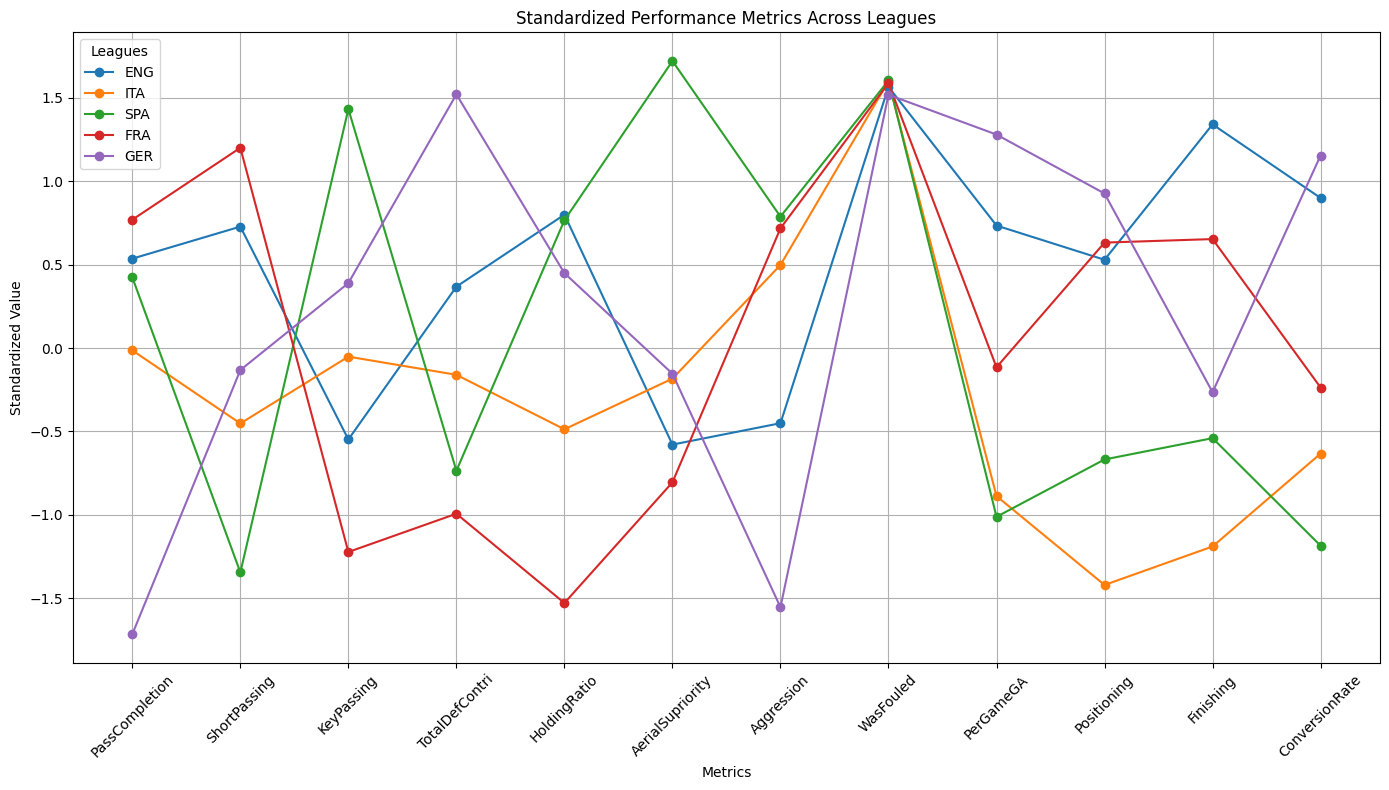

In [ ]:
# Reshape the DataFrame to long format
long_format = standardized_league_performance.melt(id_vars=['League'], var_name='Metric', value_name='Value')

# Set the figure size for better visibility
plt.figure(figsize=(14, 8))

# Plotting lines for each league across the different metrics
for league in long_format['League'].unique():
    league_data = long_format[long_format['League'] == league]
    plt.plot(league_data['Metric'], league_data['Value'], marker='o', label=league)

# Customize the plot
plt.title('Standardized Performance Metrics Across Leagues')
plt.xlabel('Metrics')
plt.ylabel('Standardized Value')
plt.xticks(rotation=45)
plt.legend(title='Leagues')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Assuming league_performance is your DataFrame
# First, define the columns you want to standardize
columns_to_standardize = ['PassCompletion', 'ShortPassing', 'KeyPassing', 'TotalDefContri', 'HoldingRatio', 'AerialSupriority', 'Aggression', 'PerGameGA', 'Positioning', 'Finishing', 'ConversionRate']

# Create a copy of the DataFrame to avoid modifying the original one
standardized_player_performance = player_performance.copy()
# Standardizing the specified columns
for column in columns_to_standardize:
    standardized_player_performance[column] = (standardized_player_performance[column] - standardized_player_performance[column].mean()) / standardized_player_performance[column].std()

# Display the standardized DataFrame
print(standardized_player_performance)

              PlayerName League  MatchesPlayed  PassCompletion  ShortPassing  KeyPassing  TotalDefContri  HoldingRatio  AerialSupriority  Endurance  Aggression  WasFouled  PerGameGA  Positioning  Finishing  ConversionRate
0      Cristiano Ronaldo    ENG             12        0.116454      0.974333   -0.448934       -0.466386     -0.324747          1.870672   4.383333   -0.480837   1.250000  -0.321630     0.121953  -0.437237       -0.017126
1     Zlatan Ibrahimović    ITA              7       -0.599348     -0.152137   -0.669537       -0.825586     -0.559178          1.672803   5.142857   -0.645415   1.000000   0.410277     1.989216  -0.119012        0.964455
2          Karim Benzema    SPA             24        1.365159      1.337537   -1.041894       -0.479241     -1.039525          0.977705   3.548611   -0.248825   1.200000   1.763028     2.012020  -0.375645        0.326779
3          Kévin Gameiro    FRA             35        0.580831      0.878731   -0.843645       -1.128364     -0.

In [ ]:
# Calculate deviation for each player
results = []

for _, player in standardized_player_performance.iterrows():
    player_deviations = {}
    player_deviations['CurrentLeague'] = player['League']
    player_deviations['PlayerName'] = player['PlayerName']

    total_deviations = {}

    for _, league in standardized_league_performance.iterrows():
        league_name = league['League']
        # Calculate absolute deviations for all metrics
        deviations = (league[1:] - player[3:]).abs()  # Exclude League and PlayerName
        total_deviation = deviations.sum()  # Total deviation

        total_deviations[league_name] = total_deviation

    # Sort leagues by deviation
    sorted_deviations = sorted(total_deviations.items(), key=lambda x: x[1])

    # Store results in desired format
    for league, dev in sorted_deviations:
        player_deviations[f'{league}'] = dev

    results.append(player_deviations)

# Create DataFrame from results for better visualization
results_df = pd.DataFrame(results)

# Reorganizing the DataFrame for output
formatted_results = pd.DataFrame(columns=['CurrentLeague', 'PlayerName'])

# Add sorted league deviations
for index, row in results_df.iterrows():
    formatted_row = {'CurrentLeague': row['CurrentLeague'], 'PlayerName': row['PlayerName']}
    for league in standardized_league_performance['League']:
        if league in row:
            formatted_row[f'{league}'] = row[league]
    # Concatenate the new formatted_row into the formatted_results DataFrame
    formatted_results = pd.concat([formatted_results, pd.DataFrame([formatted_row])], ignore_index=True)

# Display the final formatted results
print(formatted_results)

    CurrentLeague           PlayerName        ENG        ITA        SPA        FRA        GER
0             ENG    Cristiano Ronaldo   9.676372   9.279201  10.389460   9.620546  13.651529
1             ITA   Zlatan Ibrahimović  11.009875  13.213756  14.466083  12.694717  11.069448
2             SPA        Karim Benzema  11.543308  15.192859  17.472508   9.903219  14.730902
3             FRA        Kévin Gameiro   7.075063   9.679615  13.769113   5.161354  14.614395
4             ENG         Theo Walcott   8.744849  11.037846  11.674146  11.393743  13.076260
..            ...                  ...        ...        ...        ...        ...        ...
659           FRA  Remy Labeau Lascary  22.101673  15.991937   9.984052  20.447208  24.667236
660           FRA      Stredair Appuah  16.372721  13.606215  11.048228  15.400528  21.335396
661           FRA       Moussa Soumano  17.339218  16.393910  13.520596  18.321633  18.379876
662           FRA         Ivane Chegra  14.986863   9.188962

<Figure size 1200x800 with 0 Axes>

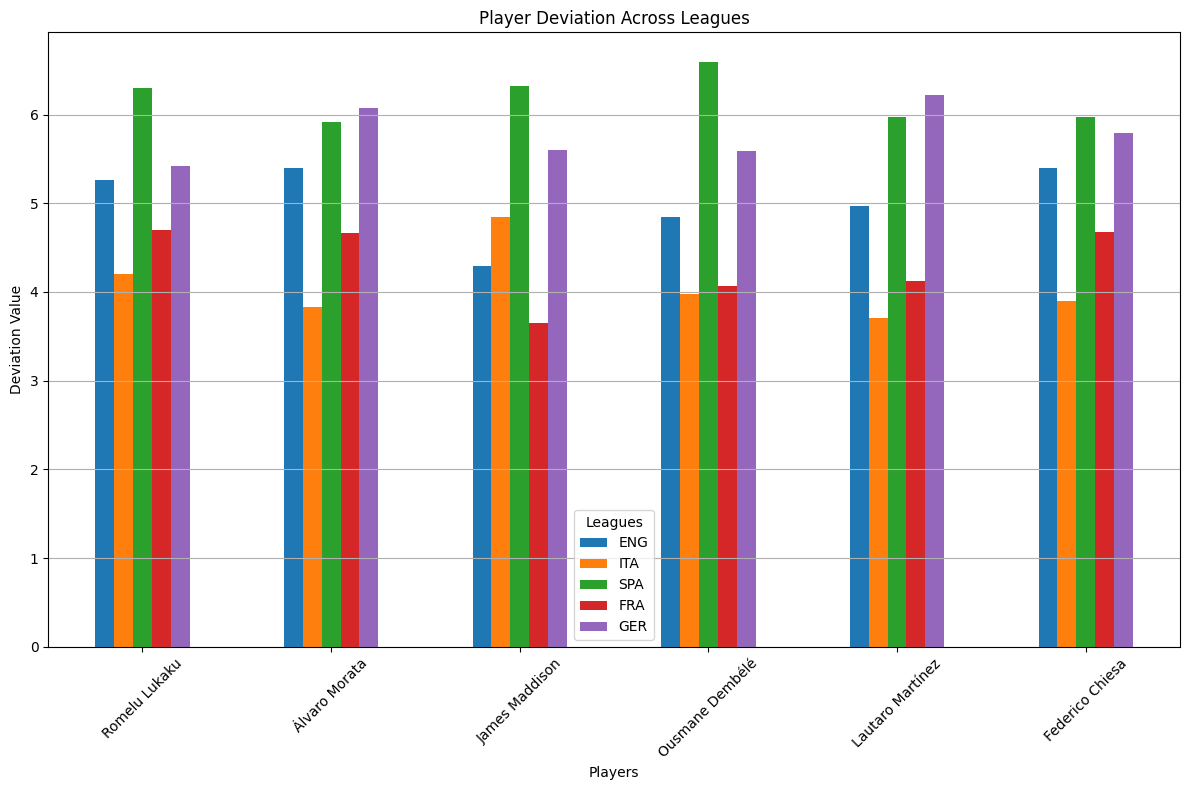

In [ ]:
specific_players = ['Federico Chiesa','Lautaro Martínez','James Maddison','Ousmane Dembélé','Romelu Lukaku','Álvaro Morata']

# Filter the DataFrame to include only the specified players
filtered_results = formatted_results[formatted_results['PlayerName'].isin(specific_players)]

# Extract league names and their respective values
league_names = ['ENG', 'ITA', 'SPA', 'FRA', 'GER']
player_names = filtered_results['PlayerName'].tolist()
deviations = filtered_results[league_names].values

# Create a DataFrame for plotting
deviation_df = pd.DataFrame(deviations, columns=league_names, index=player_names)

# Plotting
plt.figure(figsize=(12, 8))
deviation_df.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Player Deviation Across Leagues')
plt.xlabel('Players')
plt.ylabel('Deviation Value')
plt.xticks(rotation=45)
plt.legend(title='Leagues')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()